In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn import cluster
import CreateDataFunctions as df
from scipy.spatial import distance
data1, c1  = df.Data1()
data2, c2 = df.Data2()
data3, c3 = df.Data3()

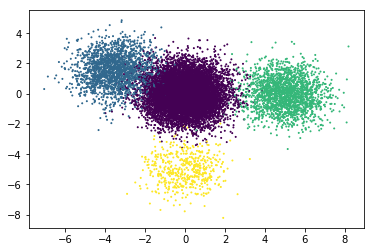

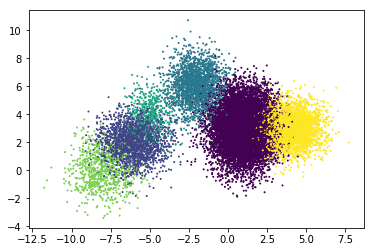

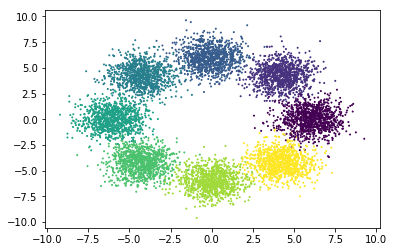

In [2]:
plt.scatter(data1[:,0],data1[:,1],s=1,c=c1)
plt.show()
plt.scatter(data2[:,0],data2[:,1],s=1,c=c2)
plt.show()
plt.scatter(data3[:,0],data3[:,1],s=1,c=c3)
plt.show()

In [3]:
def ComputeBIC(kmeans, data):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = data.shape
    
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(data[np.where(labels == i)],
    [centers[0][i]], 'euclidean')**2) for i in range(m)])
    print(cl_var)
    const_term = 0.5 * m * np.log(N) * (d+1)
    
    BIC = (np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term)*(-1)
    
    return(BIC)
    
    


In [4]:
ks = range(1,10)
KMeans = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data1) for k in ks]
KMeans = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data2) for k in ks]
KMeans = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data3) for k in ks]
BIC1 = [ComputeBIC(kmeansi,data1) for kmeansi in KMeans]
BIC2 = [ComputeBIC(kmeansi,data2) for kmeansi in KMeans]
BIC3 = [ComputeBIC(kmeansi,data3) for kmeansi in KMeans]


[2.30251401]
[6.52224928]
[9.3206665]
[10.8254427]
[11.28903899]
[11.69576868]
[11.97964557]
[12.27540476]
[12.30764067]
[5.45643142]
[8.84962924]
[11.09405148]
[12.22450535]
[12.61989663]
[12.84313852]
[13.14792353]
[13.41195946]
[13.4278948]
[19.048958]
[11.28998283]
[6.29777729]
[3.58901663]
[2.78199777]
[2.09560446]
[1.53873506]
[0.97805966]
[0.93280681]


[34146.05884462127, 48034.32068903354, 54099.94569361178, 57659.669575447486, 59674.12763077599, 61408.33140737172, 62848.21573203634, 64263.84566307703, 65013.60260820453]
[42910.77458496827, 52338.28835047827, 57356.411743555655, 60495.43260276576, 62429.43185322953, 64021.1060698247, 65457.11757821142, 66837.05124593852, 67575.67590582726]
[46291.59654236393, 47664.45217530153, 46203.313614812156, 44066.27708169489, 43706.70676528017, 42890.24146072213, 41666.32789608887, 39260.79424584471, 39609.69784000025]


Text(0, 0.5, 'value for BIC')

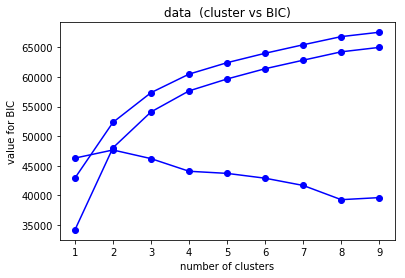

In [5]:
print(BIC1)
plt.plot(ks,BIC1,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")


print(BIC2)
plt.plot(ks,BIC2,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")


print(BIC3)
plt.plot(ks,BIC3,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")


In [9]:
print(BIC2)

[46258.147374157605, 47653.298429898794, 46173.291208560855, 44108.42791849492, 43645.41114521107, 42899.52539099678, 41573.27550958477, 39270.88714348363, 39610.49101055112]
